# Generate Lists for Neural Net

In [1]:
import csv
import bq
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

/Users/David/Desktop/Jobs/GlobalFishingWatch/github/vessel-maps/utilities/pipa_paper/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/David/Desktop/Jobs/GlobalFishingWatch/github/vessel-maps/utilities/pipa_paper/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Previous Labels
### Fishing
 - Purse seine
 - Longliner
 - Pots and traps
 - Trawler

### Non-fishing
 - Passenger
 - Tug/Pilot/Supply
 - Cargo/Tanker
 - Seismic vessel

# New Labels [and sublabels in brackets]
### Fishing
 - Longliners [Set longlines, Drifting longlines] 
 - Pole and Line    
 - Pots and Traps      
 - Purse seines        
 - Reefer              
 - Set gillnets        
 - Squid fishing               
 - Trawlers           
 - Trollers  
 - Squid
 

### Non-fishing
 - Passenger [Sailing, Motor Passenger]
 - Tug/Pilot/Supply [Tug, Piolot, Supply, Other]
 - Cargo/Tanker [Cargo, Tanker]
 - Seismic vessel [Seismic]

In [2]:
detail_to_general = {'Sailing':'Passenger',
                    'Motor Passenger':'Passenger',
                    'Passenger':'Passenger',
                    'Tug':'Tug/Pilot/Supply',
                    'Pilot':'Tug/Pilot/Supply',
                    'Supply':'Tug/Pilot/Supply',
                    'Tug/Pilot/Supply':'Tug/Pilot/Supply',
                    'Cargo':'Cargo/Tanker',
                    'Tanker':'Cargo/Tanker',
                    'Cargo/Tanker':'Cargo/Tanker',
                    'Seismic vessel':'Seismic vessel',
                    'Longliners':'Longliners',
                    'Set longlines':'Longliners', 
                    'Drifting longlines':'Longliners',
                    'Pole and Line':'Pole and Line',
                    'Pots and Traps':'Pots and Traps',
                    'Purse seines':'Purse seines',
                    'Reefer':'Reefer',
                    'Set gillnets':'Set gillnets',
                    'Trawlers':'Trawlers',
                    'Trollers':'Trollers',
                     'Fishing vessel':'Fishing vessel',
                     "Squid":"Squid"
                    }

general_to_fishing = {'Passenger':"Non-fishing",
                     'Tug/Pilot/Supply':"Non-fishing",
                     'Cargo/Tanker': "Non-fishing",
                     "Seismic vessel": "Non-fishing",
                     "Longliners":"Fishing",
                     "Pole and Line":"Fishing",
                     "Pots and Traps":"Fishing",
                     "Purse seines":"Fishing",
                     "Reefer":"Non-fishing", # this is debatable
                     "Set gillnets":"Fishing",
                     "Squid":"Fishing",
                      "Trawlers":"Fishing",
                      "Trollers":"Fishing",
                      "Fishing vessel":"Fishing"
                     }

cats_without_subcats = ["Seismic vessel","Pots and Traps",
                        "Trawlers","Purse seines","Reefer",
                        "Squid","Seismic vessel","Set gillnets",
                       "Pole and Line","Trollers"]

# Lists Previously Used by the Neural Net for Training and Testing
As of October 10, 2016, the following lists are used in the Nerual Net Classifier. Below are David's notes on what to change and use instead:

## ITU_Dec_2015_full_list.csv
 - 11774 vessels
 - It is strange that it only has the follwing categories:
```
     'FBT': _PASSENGER,
    'PA': _PASSENGER,
    'TUG': _TUG_PILOT_SUPPLY,
    'LOU': _PASSENGER,
    'GOU': _PASSENGER,
    'SLO': _PASSENGER,
    'VLR': _PASSENGER,
    'YAT': _PASSENGER,
    'RAV': _TUG_PILOT_SUPPLY,
    'LAN': _POTS_AND_TRAPS,
    # TODO: [bitsofbits] More 
```

This pdf gives all the values that are linked http://www.itu.int/net/ITU-R/terrestrial/mars/help/table-2.pdf

This is very weird because we could be including trawlers here.


## CLAVRegistryMatchingv5.csv
 - 4803 different vessels
 - I'm skeptical of the shiptype generated in this list because I know that when I concat the geartypes, it isn't always clear what the vessel type is
 - Bjorn now has newer matches

## KnownVesselCargoTanker.csv
 - 2285 vessels
 - no idea where they came from

## KristinaManualClassification.csv
 - 2184 vessels


## PyBossaNonFishing.csv
 - 153 tug boats

## AlexWManualNonFishing.csv
 - 218 vessles that are Tugs, Passengers, Tangers, Cargo

## EUFishingVesselRegister.csv
 - 6489 vessels that are matched to the EU list, with their EU list geartype. See http://ec.europa.eu/fisheries/fleet/index.cfm?method=Codification.Cod_gear for the geartype

## PeruvianSquidFleet.csv
 - Complied by Bjorn, 104 vessels

## WorldwideSeismicVesselDatabase4Dec15.csv
 - 169 vessels, with length included



 # Lists not Used
 - rivervessels_20160502.csv
 - verify5and24_20160318.csv
 - verify5and24_20160502.csv
 - FishingVesselsV2_HighConfidenceStudents_20160502.csv




# Lists We Are Going to Use


## KnownVesselCargoTanker.csv
 - 2285 vessels
 - no idea where they came from

## KristinaManualClassification.csv
 - 2184 vessels


## PyBossaNonFishing.csv
 - 153 tug boats

## AlexWManualNonFishing.csv
 - 218 vessles that are Tugs, Passengers, Tangers, Cargo

## EUFishingVesselRegister.csv
 - 6489 vessels that are matched to the EU list, with their EU list geartype. See http://ec.europa.eu/fisheries/fleet/index.cfm?method=Codification.Cod_gear for the geartype

## PeruvianSquidFleet.csv
 - Complied by Bjorn, 104 vessels

## WorldwideSeismicVesselDatabase4Dec15.csv
 - 169 vessels, with length included



 # Lists not Used
 - rivervessels_20160502.csv
 - verify5and24_20160318.csv
 - verify5and24_20160502.csv
 - FishingVesselsV2_HighConfidenceStudents_20160502.csv


In [3]:
df_cargotanker = pd.read_csv('../data/classification-list-sources/KnownVesselCargoTanker.csv')

In [4]:
df_cargotanker.groupby(['label']).count()

# Passenger [sailing, motor]
# Tug/Pilot/Supply [Tug, Piolot, Supply, Other]
# Cargo/Tanker [Cargo, Tanker]
# Seismic vessel [Seismic]

,mmsi
label,
Cargo,1128
Tanker,1156


In [5]:
cargotanker_map = {'Cargo': 'Cargo/Tanker', 
                   'Tanker': 'Cargo/Tanker'}

df_cargotanker['cargotanker_sublabel'] = df_cargotanker['label']
df_cargotanker['label'] = df_cargotanker['label'].map(cargotanker_map)


In [6]:
df_cargotanker = df_cargotanker.set_index('mmsi')
df_cargotanker=df_cargotanker.rename(columns = {'label':'cargotanker_label'})
df_cargotanker.head()

,cargotanker_label,cargotanker_sublabel
mmsi,,
111111110,Cargo/Tanker,Cargo
204708000,Cargo/Tanker,Cargo
205256290,Cargo/Tanker,Cargo
205258890,Cargo/Tanker,Cargo
205263390,Cargo/Tanker,Cargo


In [7]:
df_kristina = pd.read_csv('../data/classification-list-sources/KristinaManualClassification.csv')
df_kristina.head()

# df_kristina.ix[np.nan(df_kristina['detail'])]#['detail'] = "" 
# df_kristina['detail'][0]# is np.nan

,mmsi,label,detail
0,10421670,Purse seine,NaN
1,123450020,Purse seine,NaN
2,123450800,Purse seine,NaN
3,203226200,Passenger,sail
4,203745200,Passenger,yacht


In [8]:
# replace the detail with label
df_kristina['detail'] = df_kristina['detail'].fillna(df_kristina['label'])

In [9]:
df_kristina.head()

,mmsi,label,detail
0,10421670,Purse seine,Purse seine
1,123450020,Purse seine,Purse seine
2,123450800,Purse seine,Purse seine
3,203226200,Passenger,sail
4,203745200,Passenger,yacht


In [10]:
df_kristina.groupby(['label','detail'])['mmsi'].count()

label         detail         
Cargo         bulk carrier       564
              cargo              190
              container          153
              timber carrier       2
              vehicle carrier    118
Dredger       dredger              2
Longliner     Longliner           89
Passenger     ferry                1
              passenger           14
              sail               103
              yacht               53
Purse seine   Purse seine        105
Tanker        tanker             303
Trawler       Trawler            268
Tug           tug                 61
Unclassified  chemicals            1
              construction         1
              crane                1
              crew boat            6
              fish carrier         1
              oil tanker           1
              patrol               1
              pilot                2
              platform             3
              reefer              81
              research             7
        

In [11]:
df_subcat_map = {'bluk carrier':'Cargo',
         'cargo':'Cargo',
         'container':'Cargo',
         'timber carrier':'Cargo',
         'ferry':'Motor Passenger',
         'sail':'Sailing',
          'yacht':'Passenger',
           'passenger':'Passenger',
          'tanker':'Tanker',
          'tug':'Tug',
           'reefer': 'Reefer',
           'pilot':'Pilot',
          'fish carrier':'Reefer',
         'Purse seine':'Purse seines',
         'Trawler':'Trawlers',
         'Longliner':'Longliners'
         }

df_kristina = df_kristina[df_kristina['detail'].map(lambda x: x in df_subcat_map)]
df_kristina['detail']=df_kristina['detail'].map(df_subcat_map)
df_kristina['label'] = df_kristina['detail'].map(detail_to_general)


In [12]:
df_kristina.groupby(['label','detail'])['mmsi'].count()

label             detail         
Cargo/Tanker      Cargo              349
                  Tanker             303
Longliners        Longliners          89
Passenger         Motor Passenger      1
                  Passenger           67
                  Sailing            103
Purse seines      Purse seines       105
Reefer            Reefer              86
Trawlers          Trawlers           268
Tug/Pilot/Supply  Pilot                4
                  Tug                 61
Name: mmsi, dtype: int64

In [13]:
df_kristina=df_kristina.rename(columns = {'label':'kristina_label','detail':'kristina_sublabel'})


In [14]:
df_kristina = df_kristina.set_index('mmsi')
df_kristina.head()

,kristina_label,kristina_sublabel
mmsi,,
10421670,Purse seines,Purse seines
123450020,Purse seines,Purse seines
123450800,Purse seines,Purse seines
203226200,Passenger,Sailing
203745200,Passenger,Passenger


In [15]:
df_tugs = pd.read_csv('../data/classification-list-sources/PyBossaNonFishing.csv',skiprows=[0])
df_tugs.head()

,mmsi,label
0,205203390,Tug
1,205252690,Tug
2,205264290,Tug
3,205273990,Tug
4,205360090,Tug


In [16]:
df_tugs.groupby(['label'])['mmsi'].count()

label
Tug    153
Name: mmsi, dtype: int64

In [17]:
df_tugs['tugs_label'] = df_tugs['label'].map(detail_to_general)
df_tugs = df_tugs.rename(columns = {'label':'tugs_sublabel'})
df_tugs = df_tugs.set_index('mmsi')
df_tugs.head()

,tugs_sublabel,tugs_label
mmsi,,
205203390,Tug,Tug/Pilot/Supply
205252690,Tug,Tug/Pilot/Supply
205264290,Tug,Tug/Pilot/Supply
205273990,Tug,Tug/Pilot/Supply
205360090,Tug,Tug/Pilot/Supply


In [18]:
df_Alex = pd.read_csv('../data/classification-list-sources/AlexWManualNonFishing.csv')

In [19]:
df_Alex.groupby(['label']).count()

,mmsi
label,
Cargo,10
Dredger,1
Longliner,3
Passenger,142
Tanker,20
Trawler,1
Tug,40


In [20]:
alex_subcat_map = {'Cargo':'Cargo',
         'Dredger':'Tug/Pilot/Supply',
         'Longliner':'Longliners',
         'Passenger':'Passenger',
         'Tanker':'Tanker',
         'Trawler':'Trawlers',
                   'Tug':'Tug'
         }

df_Alex['label'] = df_Alex['label'].map(alex_subcat_map)
df_Alex['Alex_label'] = df_Alex['label'].map(detail_to_general)

In [21]:
df_Alex = df_Alex.rename(columns = {'label':'Alex_sublabel'})
df_Alex.head()

,mmsi,Alex_sublabel,Alex_label
0,203310200,Passenger,Passenger
1,205269190,Passenger,Passenger
2,205596910,Passenger,Passenger
3,211123610,Passenger,Passenger
4,211149170,Passenger,Passenger


In [22]:
df_Alex = df_Alex.set_index('mmsi')
df_Alex.groupby(['Alex_label']).count()

,Alex_sublabel
Alex_label,
Cargo/Tanker,30
Longliners,3
Passenger,142
Trawlers,1
Tug/Pilot/Supply,41


In [23]:
df_seismic = pd.read_csv('../data/classification-list-sources/WorldwideSeismicVesselDatabase4Dec15.csv')
df_seismic = df_seismic.rename(columns = {'MMSI #':'mmsi','Label':'seismic_label','Vessel length (m)':'seismic_length'})
df_seismic = df_seismic[['mmsi','seismic_label']]
df_seismic = df_seismic.drop_duplicates()
df_seismic = df_seismic.set_index('mmsi')
df_seismic.head()


,seismic_label
mmsi,
209108000,seismic vessel
209587000,seismic vessel
210228000,seismic vessel
210582000,seismic vessel
212338000,seismic vessel


In [24]:
# df_seismic = pd.read_csv('../data/classification-list-sources/WorldwideSeismicVesselDatabase4Dec15.csv')
# # column 'Vessel length (m)' has the length im neters
# # df_seismic.groupby(['Label'])['MMSI #'].count()
# df_seismic = df_seismic.rename(columns = {'MMSI #':'mmsi','Label':'seismic_label','Vessel length (m)':'seismic_length'})
# df_seismic = df_seismic[['seismic_label','seismic_length']]

df_seismic['seismic_label'] = ['Seismic vessel' for s in df_seismic['seismic_label']]
df_seismic['seismic_sublabel'] = df_seismic['seismic_label']

# df_seismic['seismic_label']=['seismic' for s in df_seismic['mmsi']]

In [25]:
df_seismic.head()

,seismic_label,seismic_sublabel
mmsi,,
209108000,Seismic vessel,Seismic vessel
209587000,Seismic vessel,Seismic vessel
210228000,Seismic vessel,Seismic vessel
210582000,Seismic vessel,Seismic vessel
212338000,Seismic vessel,Seismic vessel


In [26]:
df_river = pd.read_csv('../data/classification-list-sources/rivervessels_20160502.csv')
df_river.groupby(['label']).count()

,mmsi
label,
Supply,1
bad_data,9
cargo,104
multiple_vessles,1
not_fishing,11
not_known,16
passenger,7
tanker,3


In [27]:
df_river = df_river.set_index('mmsi')
df_river = df_river.rename(columns = {'label':'river_sublabel'})
river_subcat_map = {'cargo':'Cargo',
         'passenger':'Passenger',
         'Supply':'Supply',
         'Passenger':'Passenger',
         'tanker':'Tanker',
         }

df_river = df_river[df_river['river_sublabel'].map(lambda x: x in river_subcat_map)]
df_river['river_sublabel']=df_river['river_sublabel'].map(river_subcat_map)
df_river['river_label'] = df_river['river_sublabel'].map(detail_to_general)

In [28]:
df_river.head()

,river_sublabel,river_label
mmsi,,
203999396,Passenger,Passenger
203999399,Passenger,Passenger
211169130,Passenger,Passenger
211489990,Cargo,Cargo/Tanker
211512450,Passenger,Passenger


In [29]:
df = pd.read_csv('../data/classification-list-sources/verify5and24_20160318.csv')

In [30]:
df.groupby(['label']).count()

,task id,mmsi
label,,
Diving_ops,80,80
Dredging_or_underwater_ops,112,112
Law_enforcement,131,131
Medical_transport,15,15
Military_ops,166,166
Passenger,147,147
Pleasure_craft,107,107
Search_and_Rescue,164,164
Tanker,153,153


In [31]:
df_five24 = pd.read_csv('../data/classification-list-sources/verify5and24_20160502.csv')
df_five24.head()

,task id,mmsi,label
0,2031,244690101,cargo
1,2572,211512210,cargo
2,2587,211668930,cargo
3,2608,244660859,cargo
4,2609,258222000,cargo


In [32]:
df_five24.groupby(['label']).count()

,task id,mmsi
label,,
Diving_ops,80,80
Dredging_or_underwater_ops,112,112
Law_enforcement,133,133
Medical_transport,15,15
Military_ops,168,168
OffShore Support vessel,8,8
Passenger,193,193
Passenger and Cargo,4,4
Passenger/ferry,1,1


In [33]:
df_five24 = pd.read_csv('../data/classification-list-sources/verify5and24_20160502.csv')


# Ignore verify5and24_20160318.csv and use verify5and24_20160502

In [34]:
df_five24 = df_five24.set_index('mmsi')
df_five24 = df_five24.rename(columns = {'label':'five24_sublabel'})

five24_subcat_map = {'Passenger':'Passenger',
         'Sailing':'Sailing',
         'Trawler':'Trawlers',
         'Tug':'Tug',
         'cargo':'Cargo',
         'Port_tender':'Pilot',
         'sailing':'Sailing',
         'passenger/ferry':'Passenger',
         'tanker':'Tanker'
         }

df_five24 = df_five24[df_five24['five24_sublabel'].map(lambda x: x in five24_subcat_map)]
df_five24['five24_sublabel']=df_five24['five24_sublabel'].map(five24_subcat_map)
df_five24['five24_label'] = df_five24['five24_sublabel'].map(detail_to_general)
df_five24 = df_five24[['five24_label','five24_sublabel']]
df_five24.groupby(['five24_label']).count()

,five24_sublabel
five24_label,
Cargo/Tanker,32
Passenger,358
Trawlers,1
Tug/Pilot/Supply,261


# Ignore FishingVesselsV2_HighConfidenceStudents_20160502.csv -- doesn't add many vessels

In [35]:
df_five24.head()

,five24_label,five24_sublabel
mmsi,,
244690101,Cargo/Tanker,Cargo
211512210,Cargo/Tanker,Cargo
211668930,Cargo/Tanker,Cargo
244660859,Cargo/Tanker,Cargo
258222000,Cargo/Tanker,Cargo


In [36]:
df_ITU = pd.read_csv('../data/classification-list-sources/ITU_Dec_2015_full_list.csv')
df_ITU.head()

,MMSI,Call sign,Selective call number,Name of station,Administration/ Geographical area,Lifeboats,Auxiliary installations (EPIRBs),General classification,Individual classification,Registration number,Gross tonnage,Capacity of persons on board,Telegraph transmission frequency bands,Telegraph transmission frequency bands 2,Accounting Authority Identification Code (AAIC)
0,203002100,OEX2217,NaN,ERIKA,AUT,NaN,NaN,PL,MTB,W21365,NaN,8,NaN,V,AU01
1,203058200,OEX2794,NaN,TUAT GUAT,AUT,1,BE1,PL,YAT,N27794,"19,68",8,NaN,V,AU01
2,203111400,OEX4631,NaN,YLVI,AUT,NaN,BE1,PL,MTB,N31105,"2,99",6,NaN,V,AU01
3,203116200,OEX6722,NaN,SEVENS,AUT,1,BE1,PL,YAT,N29009,"18,72",12,NaN,V,NaN
4,203125100,OEX2289,NaN,N-23782,AUT,NaN,NaN,PL,MTB,N23782,"1,9",9,NaN,V,NaN


In [37]:
df_ITU.groupby(['Individual classification']).count()['MMSI']

Individual classification
AUX           1
BLK          16
BLS           1
CA           35
CAB           1
CHA           1
CHR           1
CON           9
CTR           1
DRG          54
EXP           5
GRF           1
HYD           6
LNG           2
LPG           1
MTB         116
OBO           5
OIL          32
PA            7
PH          116
PLT           7
PMX           1
PON           8
RAM           2
ROU           6
SAU           6
SMN           1
SRV           3
TPG          28
TPT           1
TUG          66
VLR           5
X X\nA        1
XX\n5         1
XXX       10949
YAT         203
Name: MMSI, dtype: int64

In [38]:
df_ITU = df_ITU.rename(columns = {'MMSI':'mmsi','Individual classification':'itu_sublabel'})

df_ITU = df_ITU.set_index('mmsi')

# that is a lot of categories... you can see the categories here:
# https://www.ofcom.org.uk/__data/assets/pdf_file/0024/16359/of168a.pdf
# I'm going to use the same distinctions that were used by Alex previously, 
# with some updates to divide into sailboats

itu_sublabels = {
    'FBT': 'Passenger',
 'PA': 'Passenger',
 'TUG': 'Tug',
 'LOU': "Sailing",
 'GOU': "Passenger", # these don't exist...
 'SLO': "Passenger",
 'VLR': "Sailing",
 'YAT': "Passenger",
 'RAV': "Tug/Pilot/Supply"}


df_ITU = df_ITU[df_ITU['itu_sublabel'].map(lambda x: x in itu_sublabels)]
df_ITU['itu_sublabel']=df_ITU['itu_sublabel'].map(itu_sublabels)
df_ITU['itu_label'] = df_ITU['itu_sublabel'].map(detail_to_general)
df_ITU = df_ITU[['itu_label','itu_sublabel']]
df_ITU.groupby(['itu_label']).count()

,itu_sublabel
itu_label,
Passenger,215
Tug/Pilot/Supply,66


In [39]:
ft = pd.read_csv('fishing_training.csv')
ft['mmsi'] = pd.to_numeric(ft['mmsi'])
ft = ft.set_index('mmsi')
ft.head()

,geartype,secondary geartype,length,tonnage,country
mmsi,,,,,
100000005,Fishing vessel,Fishing vessel,NaN,NaN,NaN
100000018,Fishing vessel,Fishing vessel,NaN,NaN,NaN
100000046,Fishing vessel,Fishing vessel,NaN,NaN,NaN
100000668,Fishing vessel,Fishing vessel,NaN,NaN,NaN
100001001,Fishing vessel,Fishing vessel,NaN,NaN,NaN


In [40]:
# Now, join all the dataframes on mmsi

result = df_cargotanker.join(df_kristina, how='outer')
result = result.join(df_tugs, how='outer')
result = result.join(df_Alex, how='outer')
result = result.join(df_seismic, how='outer')
result = result.join(df_river, how='outer')
result = result.join(df_five24, how='outer')
result = result.join(df_ITU,how='outer')
result = result.join(ft,how='outer')
result.head()

,cargotanker_label,cargotanker_sublabel,kristina_label,kristina_sublabel,tugs_sublabel,tugs_label,Alex_sublabel,Alex_label,seismic_label,seismic_sublabel,...,river_label,five24_label,five24_sublabel,itu_label,itu_sublabel,geartype,secondary geartype,length,tonnage,country
mmsi,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Fishing vessel,Fishing vessel,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Fishing vessel,Fishing vessel,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Fishing vessel,Fishing vessel,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Fishing vessel,Fishing vessel,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Fishing vessel,Fishing vessel,NaN,NaN,NaN


In [41]:
result.groupby('geartype')['geartype'].count()
# result.to_csv('test.csv')

geartype
Fishing vessel    39197
Longliners         1582
Pole and Line       136
Pots and Traps      398
Purse seines        709
Reefer              694
Set gillnets        576
Squid               164
Trawlers           4948
Trollers             56
Name: geartype, dtype: int64

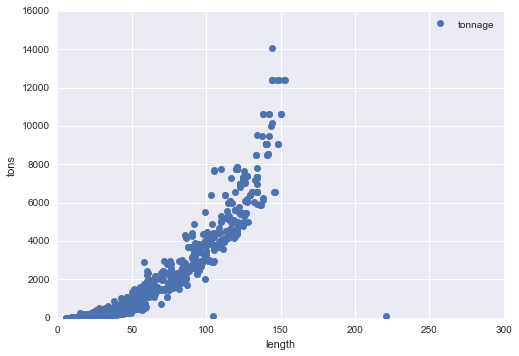

In [42]:
# Check the length and tonnage values
result.plot(x='length', y='tonnage',style='o')
plt.xlim(0,300)
plt.ylabel("tons")

### takeaway: get rid of the outliers on length -- where tonnage is less than 1000 and length is greater 100


# Now Combine Everything
There is likely a more elegant way to do this -- basically I am just making sure that if a vessel has different labels from different sources, we ignore that vessel. 

In [46]:
rows = []

vessels_to_remove = []

for i in result.index:
    if 1:
        mmsi = i
        kristina = result['kristina_label'].ix[i]
        Alex = result['Alex_label'].ix[i]
        tugs = result['tugs_label'].ix[i]
        seismic = result['seismic_label'].ix[i]
        five24_geartype = result['five24_label'].ix[i]
        fishing = result['geartype'].ix[i]
        river = result['river_label'].ix[i]
        ITU = result['itu_label'].ix[i]
        cargotanker = result['cargotanker_label'].ix[i]

        s =  set([kristina,Alex,tugs,seismic,five24_geartype,fishing,ITU,cargotanker,river])
        if np.nan in s:
            s.remove(np.nan)

        # Get rid of "Fishing vessel" if there is more than one
        # Ideally we'd do something smarter here
        if "Fishing vessel" in s and len(s)!=1:
            s.remove("Fishing vessel")

        # Skip where there is conflicting values
        if len(s)!=1:
            continue
        else:
            label = list(s)[0]


        kristina = result['kristina_sublabel'].ix[i]
        Alex = result['Alex_sublabel'].ix[i]
        tugs = result['tugs_sublabel'].ix[i]
        seismic = result['seismic_sublabel'].ix[i]
        five24_geartype = result['five24_sublabel'].ix[i]
        fishing = result['secondary geartype'].ix[i]
        river = result['river_sublabel'].ix[i]
        ITU = result['itu_sublabel'].ix[i]
        cargotanker = result['cargotanker_sublabel'].ix[i]

        sublabels = [kristina,Alex,tugs,seismic,five24_geartype,fishing,ITU,cargotanker,river]
        s = set(sublabels)
        if np.nan in s:
            s.remove(np.nan)

        # Get rid of all "Fishing vessel" unless it is the only entry
        if "Fishing vessel" in s and len(s)!=1:
            s.remove("Fishing vessel")

        # ideally we'll do something smarter here
        # right now it just skips vessels if they have conflicting
        # secondary gearytpes
        if len(s)>1:
            longs = 0
            for sh in s:
                if "ongline" in sh:
                    longs+=1
            if longs == len(s):
                s.remove("Longliners")
            else:
                print s # let's see what we are skipping
                continue # continue to the next vessel

        elif len(s)==1:
            sublabel = list(s)[0]
        else:
            sublabel = label

        # this ignores ones where the sublabel don't match with 
        # the label
        if sublabel == "" or detail_to_general[sublabel] == label:

            if sublabel == label and label not in cats_without_subcats: sublabel = ""
            is_fishing = general_to_fishing[label]

            length = result.ix[i]['length']            
            tonnage = result.ix[i]['tonnage']
            country = result.ix[i]['country']

            if length > 100 and tonnage < 1000:
                length = np.nan
                tonnage = np.nan

            # replace all NaNs with empty strings
            if np.isnan(length): length = ""
            if np.isnan(tonnage): tonnage = ""
            if length > 200: length = ""
            if not isinstance(country, basestring): country = ""
            if label=="Fishing vessel": label = ""
            row = [i,is_fishing,label,sublabel,length,tonnage,country]
            rows.append(row)
        else:
            print sublabel, label


Trawlers Longliners
Trawlers Longliners
Trawlers Longliners
Trawlers Longliners
Trawlers Longliners
Sailing Longliners
Trawlers Longliners
Trawlers Longliners


In [48]:
# yes, I shoudl just use pandas csv output, but this was already written
header = ['mmsi','is_fishing','label','sublabel','length','tonnage','country']
with open("net_training_20161024.csv", 'wb') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    writer.writerows(rows)

In [3]:
# now test to make sure everything came up okay
df = pd.read_csv('net_training_20161024.csv')

In [4]:
df.head()

,mmsi,is_fishing,label,sublabel,length,tonnage,country
0,12,Fishing,NaN,NaN,NaN,NaN,NaN
1,16,Fishing,NaN,NaN,NaN,NaN,NaN
2,56,Fishing,NaN,NaN,NaN,NaN,NaN
3,91,Fishing,NaN,NaN,NaN,NaN,NaN
4,99,Fishing,NaN,NaN,NaN,NaN,NaN


In [5]:
df.groupby(['sublabel'])['mmsi'].count()

sublabel
Cargo                 1610
Drifting longlines     192
Motor Passenger          1
Pilot                   90
Sailing                253
Set longlines          224
Supply                   1
Tanker                1487
Tug                    340
Name: mmsi, dtype: int64

In [6]:
df.groupby(['label'])['mmsi'].count()

label
Cargo/Tanker        3097
Longliners          1629
Passenger            888
Pole and Line        136
Pots and Traps       398
Purse seines         806
Reefer               704
Seismic vessel       165
Set gillnets         576
Squid                164
Trawlers            5177
Trollers              52
Tug/Pilot/Supply     432
Name: mmsi, dtype: int64

In [7]:
df.groupby(['is_fishing'])['mmsi'].count()

is_fishing
Fishing        47833
Non-fishing     5286
Name: mmsi, dtype: int64

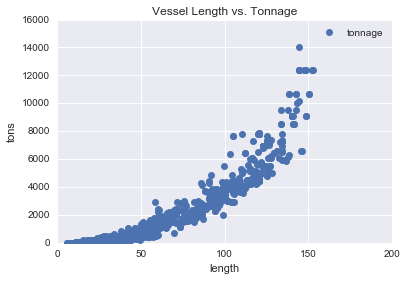

In [8]:
# check to see if we got rid of bad length and tonnage
df.plot(x='length', y='tonnage',style='o')
plt.xlim(0,200)
plt.ylabel("tons")
plt.title("Vessel Length vs. Tonnage")

In [13]:
df.groupby(['tonnage'])['mmsi'].count().sum()

13132

In [14]:
df.groupby(['length'])['mmsi'].count().sum()

8159